**Análisis bivariado - LoL e-sports**

In [ ]:
!pip install pandas_profiling --upgrade

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [24]:
url_teams = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/df_teams.csv'
df = pd.read_csv(url_teams)
df.drop(['position','player','champion','game','date','teamkills','teamdeaths','firstbloodkill','firstbloodassist','firstbloodvictim','turretplates','opp_turretplates','heralds','opp_heralds'],axis=1,inplace=True)
df['quadrakills'] = df['quadrakills'].fillna(0) 
df['pentakills'] = df['pentakills'].fillna(0)
df.head()

,gameid,split,playoffs,playerid,side,team,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,firstherald,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,totalgold,earnedgold,earned gpm,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,6909-9183-1-1,Spring,0,100,Blue,Top Esports,2050,0,3,9,6,0.0,0.0,0.0,0.0,1.0,0.0878,0.3512,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0,6.0,1.0,1.0,0.0,1.0,63315.0,1853.1220,2559.0146,1990.8585,101.0,2.9561,83.0,2.4293,40.0,54617,32329.0,946.2146,53550.0,1230.0,987.0,243.0,162.0,13.0,36.0000,16177.0,19640.0,380.0,15445.0,19565.0,360.0,732.0,75.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0,24815.0,31121.0,608.0,23864.0,31228.0,590.0,951.0,-107.0,18.0,1.0,1.0,0.0,0.0,0.0,1.0
1,6909-9183-1-1,Spring,0,200,Red,Suning,2050,1,9,3,28,1.0,0.0,0.0,0.0,0.0,0.2634,0.3512,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,6.0,3.0,0.0,0.0,1.0,0.0,58406.0,1709.4439,2940.4390,2526.6146,161.0,4.7122,61.0,1.7854,46.0,60520,38232.0,1118.9854,53575.0,1215.0,947.0,268.0,199.0,12.0,35.5610,15445.0,19565.0,360.0,16177.0,19640.0,380.0,-732.0,-75.0,-20.0,0.0,0.0,1.0,1.0,1.0,0.0,23864.0,31228.0,590.0,24815.0,31121.0,608.0,-951.0,107.0,-18.0,0.0,0.0,1.0,1.0,1.0,0.0
2,6909-9184-2-2,Spring,0,100,Blue,Top Esports,2241,0,16,27,27,2.0,0.0,0.0,0.0,0.0,0.4284,1.1513,0.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,6.0,7.0,1.0,1.0,0.0,2.0,84516.0,2262.8112,3790.4150,3101.6600,121.0,3.2396,73.0,1.9545,42.0,69692,45456.0,1217.0281,65536.0,1243.0,957.0,286.0,181.0,15.0,33.2798,16752.0,20020.0,361.0,15250.0,18856.0,321.0,1502.0,1164.0,40.0,2.0,2.0,1.0,1.0,1.0,2.0,27355.0,32158.0,560.0,25210.0,32578.0,516.0,2145.0,-420.0,44.0,5.0,6.0,6.0,6.0,9.0,5.0
3,6909-9184-2-2,Spring,0,200,Red,Suning,2241,1,27,17,59,6.0,1.0,0.0,0.0,1.0,0.7229,1.1513,1.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,7.0,6.0,0.0,0.0,2.0,0.0,97504.0,2610.5489,3192.6372,2521.8206,155.0,4.1499,55.0,1.4726,49.0,70269,46033.0,1232.4766,66558.0,1191.0,939.0,252.0,195.0,10.0,31.8876,15250.0,18856.0,321.0,16752.0,20020.0,361.0,-1502.0,-1164.0,-40.0,1.0,1.0,2.0,2.0,2.0,1.0,25210.0,32578.0,516.0,27355.0,32158.0,560.0,-2145.0,420.0,-44.0,6.0,9.0,5.0,5.0,6.0,6.0
4,6910-9189-1-1,Spring,0,100,Blue,Oh My God,1887,0,4,15,9,0.0,0.0,0.0,0.0,1.0,0.1272,0.6041,1.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,3.0,9.0,0.0,0.0,0.0,1.0,37351.0,1187.6312,2777.9332,1912.7822,104.0,3.3068,47.0,1.4944,32.0,51145,30520.0,970.4293,49750.0,1066.0,848.0,218.0,163.0,7.0,33.8951,15842.0,18405.0,322.0,15812.0,18712.0,333.0,30.0,-307.0,-11.0,2.0,3.0,2.0,2.0,4.0,2.0,24131.0,29284.0,527.0,24588.0,30502.0,543.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0,3.0,5.0,2.0


In [25]:
df.shape

(682, 81)

**Profiling del data frame**

In [26]:
features = ['result','gamelength','kills','deaths','assists','doublekills','triplekills','quadrakills','pentakills','firstblood','team kpm','ckpm','firstdragon','dragons','opp_dragons','firstherald','firstbaron','barons','opp_barons','firsttower','towers','opp_towers','firstmidtower','firsttothreetowers','inhibitors','opp_inhibitors','damagetochampions','dpm','damagetakenperminute','wardsplaced','wpm','wardskilled','wcpm','controlwardsbought','totalgold','earned gpm','goldspent','total cs','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle','cspm','goldat10','xpat10','csat10','golddiffat10','xpdiffat10','csdiffat10','killsat10','assistsat10','deathsat10','opp_killsat10','opp_assistsat10','opp_deathsat10','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15']
df_feat =  df[features]

In [ ]:
profile = pandas_profiling.ProfileReport(df_feat)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

El reporte generado es muy pesado y Colab no lo está cargando, genero el archivo en HTML, lo descargo y presento más abajo algunos datos interesante

In [ ]:
profile.to_file('profile_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Es posible ver el reporte en GitHub: [profile_reporte.html](https://media.githubusercontent.com/media/cporras/lol-esports/main/Data/profile_report.html) (Pesa más de 250MB)

**Heat Map - Mapa de correlación**

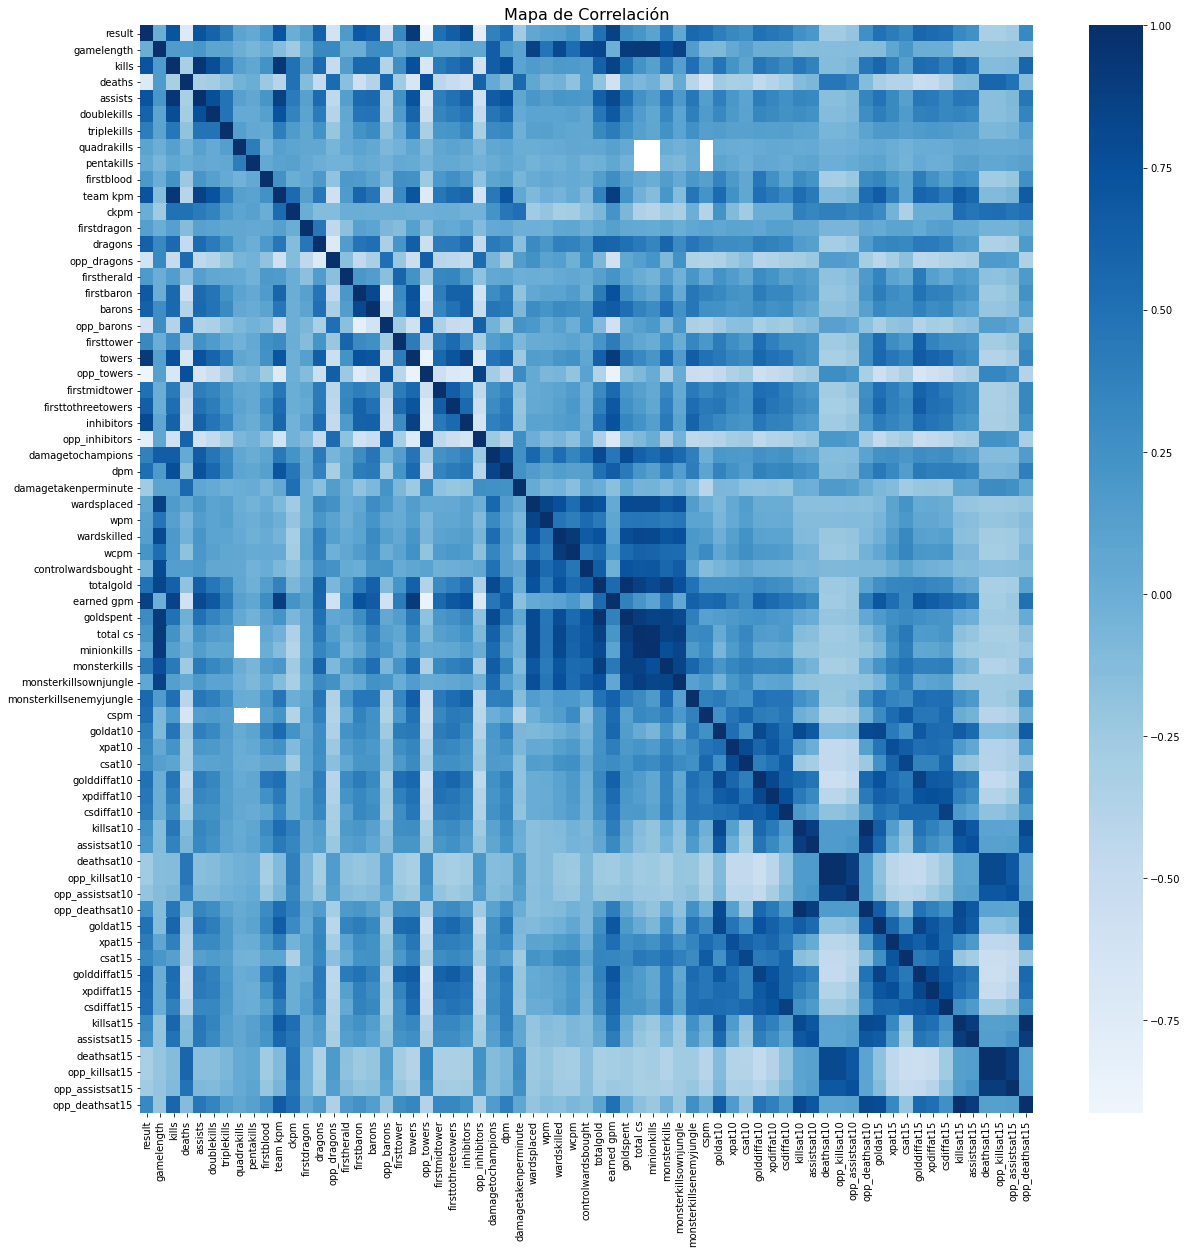

In [29]:
plt.figure(figsize=(20, 20))

sns.heatmap(df_feat.corr(), annot = False, center=0, cmap = 'Blues')
plt.title('Mapa de Correlación', fontsize = 16)
plt.show()

**Scatterplot result y kills**

Se espera una correlación lineal, a mayores kills se obtiene más ventaja en una partida. No nos dice mucho sin antes agrupar los datos

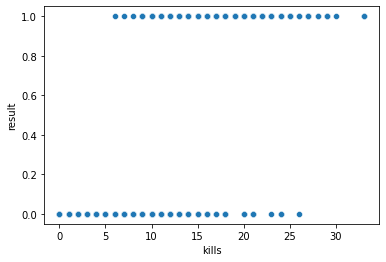

In [30]:
sns.scatterplot(data = df_feat, y= 'result', x= 'kills')

Media de resultado agrupado por asesinatos del equipo

In [31]:
df_feat.groupby('kills').mean()['result']

kills
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.030303
7     0.031250
8     0.032258
9     0.147059
10    0.333333
11    0.300000
12    0.500000
13    0.580645
14    0.687500
15    0.812500
16    0.636364
17    0.937500
18    0.857143
19    1.000000
20    0.928571
21    0.857143
22    1.000000
23    0.928571
24    0.846154
25    1.000000
26    0.666667
27    1.000000
28    1.000000
29    1.000000
30    1.000000
33    1.000000
Name: result, dtype: float64

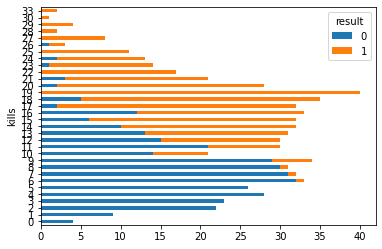

In [32]:
# lo podemos ver graficamente
pd.crosstab(df_feat['kills'],df['result']).plot(kind='barh', stacked=True)

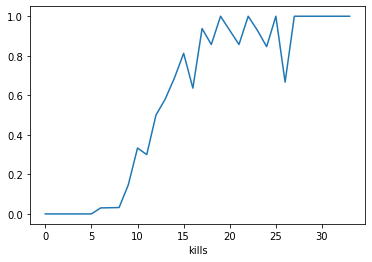

In [33]:
df_feat.groupby('kills').mean()['result'].plot.line()

**Diferencia de Oro a los 10 minutos vs resultado de la partida**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


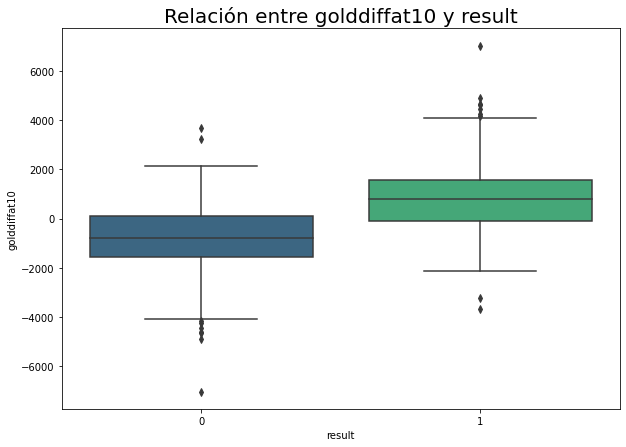

In [34]:
# golddiffat10 vs result
plt.figure(figsize=(10, 7))
sns.boxplot(df_feat['result'], df_feat['golddiffat10'], palette = 'viridis')
plt.title('Relación entre golddiffat10 y result', fontsize = 20)
plt.show()